<a href="https://colab.research.google.com/github/Ayushnegi317/EDA-projects/blob/main/Filpkart_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

In [ ]:
data1=pd.read_csv("/content/FinalFlipkartData.csv")

In [ ]:
data1

,Brand,Title,Product Type,Who,Price,MRP,Savings,Discount %,Rating,Total Ratings Given,Total Reviews Given
0,NIKE,NIKE Nike Revolution 4 Men'...,shoes,men,2216,3693.33,1477,40.0,4.2,54006,7049
1,Layasa,Layasa sports shoes for men...,shoes,men,379,997.37,618,62.0,4.0,13792,1677
2,YONEX,YONEX Tokyo 2 Badminton Sho...,shoes,men,1919,2998.44,1079,36.0,4.3,1298,172
3,ADIDAS,ADIDAS Clear Factor M Runni...,shoes,men,1499,2498.33,999,40.0,4.2,3904,578
4,PUMA,PUMA Space Runner Running S...,shoes,men,2050,3474.58,1424,41.0,4.2,194,36
...,...,...,...,...,...,...,...,...,...,...,...
1634,MARVEL,MARVEL Boys Velcro Sports S...,sandal,kid,719,998.61,279,28.0,4.1,254,44
1635,CAMPUS,CAMPUS Boys Velcro Sports S...,sandal,kid,549,549.00,0,0.0,4.3,936,134
1636,CAMPUS,CAMPUS Boys Velcro Sports S...,sandal,kid,569,569.00,0,0.0,4.0,236,23
1637,CAMPUS,CAMPUS Boys Velcro Sports S...,sandal,kid,459,459.00,0,0.0,4.1,672,88


In [ ]:
data1.describe()

,Price,MRP,Savings,Discount %,Rating,Total Ratings Given,Total Reviews Given
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,900.738865,1716.956882,815.811470,45.569860,3.985784,1730.180598,224.970714
std,966.610384,1476.457547,778.801047,23.055618,0.348202,8655.260853,1125.891795
min,149.000000,219.000000,0.000000,0.000000,3.000000,1.000000,1.000000
25%,379.000000,891.070000,310.000000,32.000000,3.800000,23.000000,3.000000
50%,599.000000,1198.280000,598.000000,50.000000,4.000000,109.000000,13.000000
75%,999.000000,1986.360000,1085.500000,62.000000,4.200000,496.500000,61.000000
max,8495.000000,10759.180000,5487.000000,89.000000,5.000000,167992.000000,20241.000000


In [ ]:
include=['object']
data1.describe(include=include)

,Brand,Title,Product Type,Who
count,1639,1639,1639,1639
unique,377,916,8,4
top,ADIDAS,CAMPUS Boys Velcro Sports S...,shoes,men
freq,114,34,335,710


In [ ]:
data1['Product Type'].value_counts()

shoes      335
tshirt     280
lower      230
sandal     215
watch      185
shirt      180
glasses    150
sleeper     64
Name: Product Type, dtype: int64

In [ ]:
data1['Who'].value_counts()

men      710
women    604
kid      280
kids      45
Name: Who, dtype: int64

In [ ]:
#lets check mens are buys Most 
data2=data1.groupby('Who')
data3=data2.get_group("men")
mens=data3.value_counts("Product Type")
mens

Product Type
shoes      120
lower       95
sandal      95
tshirt      95
watch       95
shirt       90
glasses     65
sleeper     55
dtype: int64

In [ ]:
nice=data1.groupby(['Product Type','Who']).size().reset_index(name="Total No. of Purchase")

In [ ]:
nice2=nice.groupby('Who')
mens_product=nice2.get_group('men')

In [ ]:
pl.bar(mens_product,x='Product Type',y="Total No. of Purchase",color='Product Type')

In [ ]:
# let find for womens shopping categories
data2=data1.groupby('Who')
data3=data2.get_group("women")
mens=data3.value_counts("Product Type")
mens

Product Type
shoes      125
lower       90
shirt       90
tshirt      90
watch       90
glasses     80
sandal      30
sleeper      9
dtype: int64

In [ ]:
nice=data1.groupby(['Product Type','Who']).size().reset_index(name="Total No. of Purchase")
nice2=nice.groupby('Who')
womens_product=nice2.get_group('women')



In [ ]:
pl.bar(womens_product,x='Product Type',y="Total No. of Purchase")

In [ ]:
# let see for kids
data2=data1.groupby('Who')
data3=data2.get_group("kid")
mens=data3.value_counts("Product Type")
mens


Product Type
tshirt     95
sandal     90
shoes      90
glasses     5
dtype: int64

In [ ]:
nice=data1.groupby(['Product Type','Who']).size().reset_index(name="Total No. of Purchase")
nice2=nice.groupby('Who')
kids_product=nice2.get_group('kid')

In [ ]:
pl.bar(kids_product,x='Product Type',y="Total No. of Purchase",color='Product Type')

In [ ]:
nice=data1.groupby(['Rating']).size().reset_index(name="Counts")

<Figure size 1440x720 with 0 Axes>

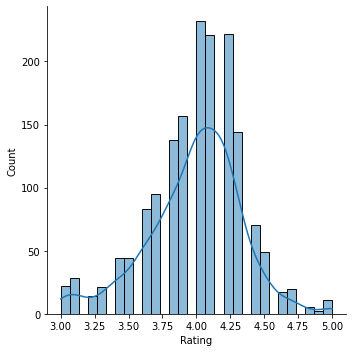

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=data1,x='Rating',kde=True)
plt.show()

In [ ]:
pl.scatter(data1,x='MRP',y='Discount %',trendline="ols")

In [ ]:
pl.pie(data1,names='Product Type',values='Savings')